<a href="https://colab.research.google.com/github/sumukhbhat12/Tensor-Flow-Course-FreeCodeCamp/blob/main/Core_Learning_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

This dataset has been referred from Kaggle

dataset: https://www.kaggle.com/datasets/yasserh/titanic-dataset

In [47]:
df = pd.read_csv('/content/Titanic-Dataset.csv')

In [48]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


divide the dataset into test and train

In [49]:
df_train, df_test = np.split(df.sample(frac=1), [int(0.8 * len(df))])
print(len(df_train), len(df_test))

712 179


In [50]:
X_train = df_train
X_test = df_test
y_train = X_train.pop('Survived')
y_test = X_test.pop('Survived')

In [51]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
616,617,3,"Danbom, Mr. Ernst Gilbert",male,34.0,1,1,347080,14.4000,NaN,S
621,622,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S
824,825,3,"Panula, Master. Urho Abraham",male,2.0,4,1,3101295,39.6875,NaN,S
638,639,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S
229,230,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S


In [52]:
y_train.head(10)

616    0
621    1
824    0
638    0
229    0
569    1
777    1
875    1
211    1
355    0
Name: Survived, dtype: int64

visualizing the dataset

<Axes: >

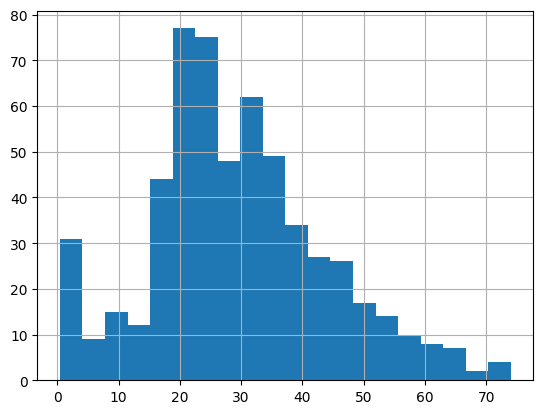

In [53]:
X_train.Age.hist(bins=20)

value_counts() gives count of unique elements and sorted in descending order

<Axes: >

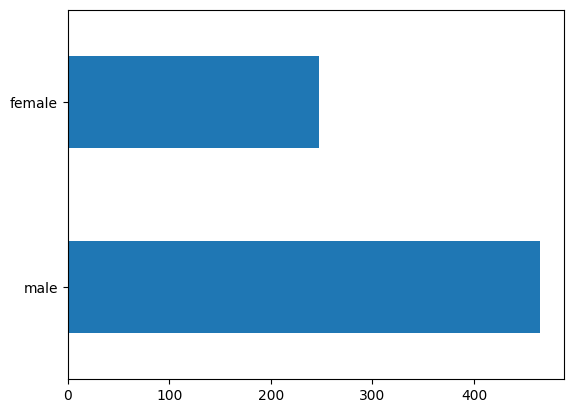

In [54]:
X_train.Sex.value_counts().plot(kind='barh')

<Axes: >

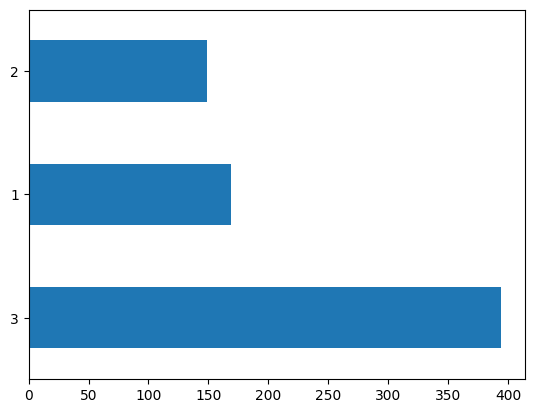

In [55]:
X_train['Pclass'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survived')

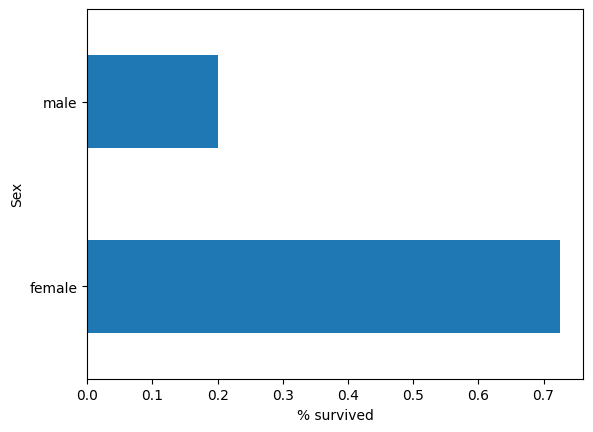

In [56]:
pd.concat([X_train, y_train], axis=1).groupby('Sex').Survived.mean().plot(kind='barh').set_xlabel('% survived')

In [57]:
categorical_columns = ['Sex','Cabin','Embarked', 'SibSp', 'Pclass', 'Parch']
Numeric_columns = ['Age', 'Fare']
# 'Ticket' and 'Name columns are unique for all individuals hence we'll drop it since we don't have any use for that column

Check how many unique items does categorical columns have

In [58]:
len(df['Ticket'].unique())

681

In [59]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [60]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [61]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [62]:
df['Pclass'].unique()

array([3, 1, 2])

In [63]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [64]:
X_train = X_train.drop(['Name','Ticket'], axis=1)
X_test = X_test.drop(['Name', "Ticket"], axis=1)

In [65]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
616,617,3,male,34.0,1,1,14.4000,NaN,S
621,622,1,male,42.0,1,0,52.5542,D19,S
824,825,3,male,2.0,4,1,39.6875,NaN,S
638,639,3,female,41.0,0,5,39.6875,NaN,S
229,230,3,female,NaN,3,1,25.4667,NaN,S
...,...,...,...,...,...,...,...,...,...
480,481,3,male,9.0,5,2,46.9000,NaN,S
822,823,1,male,38.0,0,0,0.0000,NaN,S
0,1,3,male,22.0,1,0,7.2500,NaN,S
776,777,3,male,NaN,0,0,7.7500,F38,Q


In [66]:
X_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
88,89,1,female,23.0,3,2,263.0000,C23 C25 C27,S
396,397,3,female,31.0,0,0,7.8542,NaN,S
471,472,3,male,38.0,0,0,8.6625,NaN,S
329,330,1,female,16.0,0,1,57.9792,B18,C
508,509,3,male,28.0,0,0,22.5250,NaN,S


In [67]:
X_train.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age            141
SibSp            0
Parch            0
Fare             0
Cabin          551
Embarked         2
dtype: int64

only take the first letter of cabins into consideration and discard everything else

In [68]:
def convert_cabin(df):
  # df['Cabin'] = [ cabin[0] for cabin in df['Cabin'] if type(cabin) == str else cabin]
  list_of_cabins = []
  for cabin in df['Cabin']:
    if type(cabin) == str:
      list_of_cabins.append(cabin[0])
    else:
      list_of_cabins.append(cabin)
  df['Cabin'] = list_of_cabins
  return df

convert cabin info into single letters

In [69]:
X_train = convert_cabin(X_train)

In [70]:
X_train['Cabin'].unique()

array([nan, 'D', 'E', 'B', 'C', 'A', 'G', 'F', 'T'], dtype=object)

In [71]:
X_test = convert_cabin(X_test)

In [72]:
feature_columns = []

In [73]:
for feature_name in categorical_columns:
  vocabulary = X_train[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [74]:
for feature_name in Numeric_columns:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [76]:
print(feature_columns)

[VocabularyListCategoricalColumn(key='Sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Cabin', vocabulary_list=(nan, 'D', 'E', 'B', 'C', 'A', 'G', 'F', 'T'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Embarked', vocabulary_list=('S', 'C', 'Q', nan), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='SibSp', vocabulary_list=(1, 4, 0, 3, 2, 8, 5), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Pclass', vocabulary_list=(3, 1, 2), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Parch', vocabulary_list=(1, 0, 5, 2, 4, 3, 6), dtype=tf.int64, default_value=-1, num_oov_buckets=0), NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Fare', shape=(1,), default_value=None, dtyp

Input function to convert input pandas dataframe into tf.data.Dataset object, which is fed into the TensorFlow model

In [81]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices(dict(data_df), label_df)
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_fn(X_train, y_train)
test_input_fn = make_input_fn(X_test, y_test, num_epochs=1, shuffle=False)

Creating the model